In [1]:

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.callbacks import ModelCheckpoint, TensorBoard

from keras.models import Sequential
from keras.layers import Dense

import seaborn as sns

import numpy as np

In [2]:
from numpy.random import seed
import tensorflow as tf

SEED = 42
seed(SEED)  # for numpy
tf.random.set_seed(SEED)  # for TensorFlow


In [3]:
from numpy.random import seed
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

SEED = 42
seed(SEED)  # for numpy
tf.set_random_seed(SEED)  # for TensorFlow



Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
df = pd.read_csv('fraudTest.csv')

df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
# Encoding
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is of type 'object' (usually string)
        df[col] = df[col].astype('category').cat.codes  # Convert strings to unique integer codes

# Display the first few rows to check the changes
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2291163933867244,319,10,2.86,151,115,1,341,...,33.9659,-80.9355,333497,275,376,98699,1371816865,33.986391,-81.200714,0
1,1,1,3573030041201292,591,10,29.84,163,457,0,354,...,40.3207,-110.4360,302,392,760,108785,1371816873,39.450498,-109.960431,0
2,2,2,3598215285024754,611,5,41.28,24,249,0,865,...,40.6729,-73.5365,34496,259,421,433979,1371816893,40.495810,-74.196111,0
3,3,3,3591919803438423,222,9,60.05,42,457,1,320,...,28.5697,-80.8191,54767,407,718,71993,1371816915,28.812398,-80.883061,0
4,4,4,3526826139003047,292,13,3.19,247,261,1,548,...,44.2529,-85.0170,1126,196,177,190585,1371816917,44.959148,-85.884734,0


# Plot the labels distribution

is_fraud
0    553574
1      2145
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21872\1630492071.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  labels_dist = pd.value_counts(df['is_fraud'], sort = True)


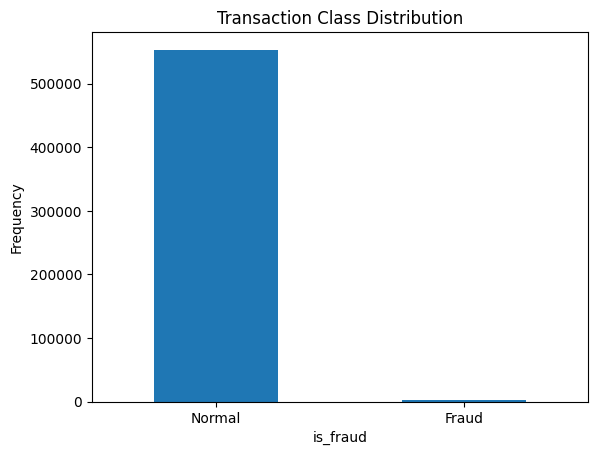

In [6]:
labels_dist = pd.value_counts(df['is_fraud'], sort = True)

labels_dist.plot(kind = 'bar', rot = 0)
plt.title('Transaction Class Distribution')
plt.xticks(range(2), ["Normal", "Fraud"])
plt.xlabel('is_fraud')
plt.ylabel('Frequency')


print(labels_dist)

# Plot transactions amount

In [7]:
frauds = df[df.is_fraud == 1]
normal = df[df.is_fraud == 0]


print(frauds['amt'].describe()) #frauds.Amount.describe()
print('\n')
print(normal['amt'].describe())

count    2145.000000
mean      528.356494
std       392.747594
min         1.780000
25%       214.510000
50%       371.940000
75%       907.770000
max      1320.920000
Name: amt, dtype: float64


count    553574.000000
mean         67.614408
std         152.471931
min           1.000000
25%           9.600000
50%          47.150000
75%          82.620000
max       22768.110000
Name: amt, dtype: float64


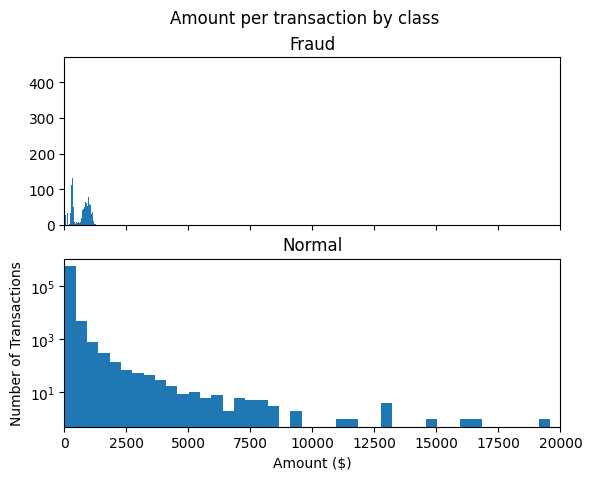

In [8]:
wholeFrame, (subFrame1, subFrame2) = plt.subplots(2, 1, sharex = True)

wholeFrame.suptitle('Amount per transaction by class')

BIN = 50

subFrame1.hist(frauds['amt'], bins = BIN)
subFrame2.hist(normal['amt'], bins = BIN)

subFrame1.set_title('Fraud')
subFrame2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')

plt.xlim(0, 20000)
plt.yscale('log')

Text(0.5, 1.0, 'Time vs Amount')

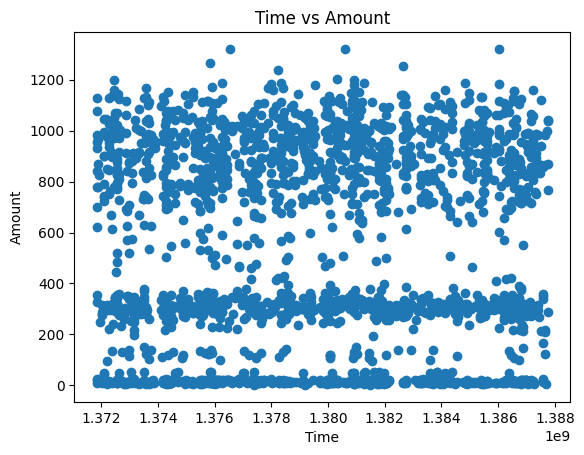

In [9]:
plt.scatter(frauds['unix_time'], frauds['amt'])
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Time vs Amount')

#No visibly patterns of difference of amount transactions with time changes

# Remove unecessary descriptors / features

In [10]:
df.drop_duplicates(inplace = True)

if  df.isnull().values.any() != False:
        df.fillna(0)

# Standardize to 0 mean and 1.0 variance for Amount column

In [11]:
df['amt'] = StandardScaler().fit_transform(df['amt'].values.reshape(-1, 1))

# Split Data to Training and Testing Data

In [12]:
SPLIT = 0.2
training_data, testing_data = train_test_split(df, test_size = SPLIT, random_state = SEED)

In [13]:
SPLIT = 0.2
training_data, testing_data = train_test_split(df, test_size = SPLIT, random_state = SEED)

In [35]:
training_data


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
139526,139526,136993,374125201044065,92,2,-0.048823,68,157,1,195,...,38.9757,-77.0282,601723,310,417,432071,1376047844,38.368797,-76.170115,0
395747,395747,389216,3527536963490470,638,9,0.749859,313,401,0,271,...,32.9413,-81.1807,1725,410,500,431640,1385219474,32.342834,-81.123567,0
395119,395119,388601,3558881852140592,468,4,0.371411,68,196,1,48,...,35.2563,-111.9500,759,204,199,420365,1385204770,36.255327,-112.176851,0
552207,552207,541319,3534718226968689,169,7,-0.337698,213,249,0,310,...,37.3712,-89.1349,2263,394,657,126008,1388445270,38.239454,-88.922320,0
487836,487836,478774,4998109455173950,274,5,-0.138969,224,345,0,268,...,38.9621,-94.5959,545147,107,727,232015,1387212784,39.306352,-94.958490,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,110268,108207,377234009633447,533,4,0.222380,316,35,0,419,...,39.3716,-77.8229,1925,430,335,406625,1375085627,38.955449,-77.031434,0
259178,259178,254661,4992346398065154184,333,6,0.127450,29,228,1,856,...,41.1730,-89.2187,532,39,182,555492,1380035131,40.448929,-88.357932,0
365838,365838,359731,4550599031376731,303,8,-0.410364,16,451,0,877,...,40.7559,-82.5123,92985,336,380,507822,1384053795,41.533541,-82.797399,0
131932,131932,129490,342351256941125,543,4,0.845874,265,313,0,536,...,33.1194,-83.8235,3343,449,766,396844,1375773987,32.871628,-84.091574,0


In [36]:
# Define target column
target_column = 'is_fraud'  # Update if your target column name is different

# Separate features and target in training and testing data
X_train = training_data.drop(columns=[target_column])
y_train = training_data[target_column]

X_test = testing_data.drop(columns=[target_column])
y_test = testing_data[target_column]


In [ ]:
from imblearn.combine import SMOTEENN
import numpy as np

# Instantiate SMOTE-ENN with a random state
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTE-ENN resampling to the training data
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Reshape the resampled data to 3D for LSTM: [samples, timesteps, features]
# Here we use one timestep and all features in each sample
X_resampled = np.expand_dims(X_resampled, axis=-1)  # Adds a dimension at the end for features
X_test = np.expand_dims(X_test, axis=-1)

# Check the shapes
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


In [ ]:
# Define the LSTM model with corrected input shape
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(Input(shape=(input_shape[1], input_shape[2])))  # Using the reshaped input with [samples, timesteps, features]
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Now create the model with the new input shape
lstm_model = create_lstm_model(X_resampled.shape)

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
# Train the LSTM model
lstm_model.fit(
    X_resampled, y_resampled,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

In [ ]:
# Model Evaluation
y_pred = lstm_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

In [ ]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Legit', 'Fraud'])

print("Model Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", report)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from decimal import Decimal, getcontext

In [ ]:
# Predict using your LSTM model on test data
y_pred = lstm_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Threshold to get binary predictions
# Calculate accuracy using sklearn and Decimal for high precision
accuracy = accuracy_score(y_test, y_pred)
accuracy_precise = Decimal(accuracy)

# Print accuracy to 15 decimal places
print("Model Accuracy (15 decimal places):", accuracy_precise)